In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6746ba6b3c16e77145d6ee5dc11b8c1a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | padang
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | tautira
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | taicheng
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | san vicente
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | wad rawah
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | sistranda
Processing Record 18 of Set 1 | karpathos
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | konza
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 23 of Set 1 | mabaruma
Processing Record 24 of 

Processing Record 41 of Set 4 | nizwa
Processing Record 42 of Set 4 | maun
Processing Record 43 of Set 4 | butaritari
Processing Record 44 of Set 4 | vapi
Processing Record 45 of Set 4 | trinidad
Processing Record 46 of Set 4 | mayor pablo lagerenza
Processing Record 47 of Set 4 | itarema
Processing Record 48 of Set 4 | cayenne
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 50 of Set 4 | langsa
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | asau
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | jaisalmer
Processing Record 5 of Set 5 | tecoanapa
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | road town
Processing Record 8 of Set 5 | aksu
Processing Record 9 of Set 5 | arrecife
Processing Record 10 of Set 5 | edson
Processing Record 11 of Set 5 | cap malheureux
Processing Record 12 of Set 5 | victoria
Processing Record 13 of Set 5 | pacific grove
Processing Record 14 of S

Processing Record 30 of Set 8 | canutama
Processing Record 31 of Set 8 | shimoda
Processing Record 32 of Set 8 | sorvag
City not found. Skipping...
Processing Record 33 of Set 8 | jalingo
Processing Record 34 of Set 8 | lipin bor
Processing Record 35 of Set 8 | dwarka
Processing Record 36 of Set 8 | san quintin
Processing Record 37 of Set 8 | kavaratti
Processing Record 38 of Set 8 | umm durman
City not found. Skipping...
Processing Record 39 of Set 8 | kattivakkam
Processing Record 40 of Set 8 | vedaranniyam
City not found. Skipping...
Processing Record 41 of Set 8 | pasighat
Processing Record 42 of Set 8 | san cristobal
Processing Record 43 of Set 8 | acapulco
Processing Record 44 of Set 8 | berkak
Processing Record 45 of Set 8 | pangnirtung
Processing Record 46 of Set 8 | russkoye
Processing Record 47 of Set 8 | yarmouth
Processing Record 48 of Set 8 | vuktyl
Processing Record 49 of Set 8 | broken hill
Processing Record 50 of Set 8 | nishihara
Processing Record 1 of Set 9 | george
P

Processing Record 15 of Set 12 | rawson
Processing Record 16 of Set 12 | brun
Processing Record 17 of Set 12 | hanover
Processing Record 18 of Set 12 | talara
Processing Record 19 of Set 12 | agbor
Processing Record 20 of Set 12 | la seyne-sur-mer
Processing Record 21 of Set 12 | kiunga
Processing Record 22 of Set 12 | dombarovskiy
Processing Record 23 of Set 12 | thunder bay
Processing Record 24 of Set 12 | yar-sale
Processing Record 25 of Set 12 | bolila
Processing Record 26 of Set 12 | wajima
Processing Record 27 of Set 12 | galgani
City not found. Skipping...
Processing Record 28 of Set 12 | mbamba
Processing Record 29 of Set 12 | lardos
Processing Record 30 of Set 12 | amazar
Processing Record 31 of Set 12 | khagrachari
City not found. Skipping...
Processing Record 32 of Set 12 | peniche
Processing Record 33 of Set 12 | kununurra
Processing Record 34 of Set 12 | boa vista
Processing Record 35 of Set 12 | nalut
Processing Record 36 of Set 12 | padilla
Processing Record 37 of Set 12

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,69.21,85,0,15.08,ZA,2020-12-08 01:47:01
1,Padang,-0.95,100.35,83.16,63,65,0.92,ID,2020-12-08 01:49:24
2,Tuktoyaktuk,69.45,-133.04,3.20,84,90,5.82,CA,2020-12-08 01:49:24
3,Tautira,-17.73,-149.15,77.00,78,75,4.70,PF,2020-12-08 01:49:24
4,Tasiilaq,65.61,-37.64,15.80,61,0,3.36,GL,2020-12-08 01:49:25
5,Airai,-8.93,125.41,73.99,71,100,2.80,TL,2020-12-08 01:49:25
6,Taicheng,38.73,113.23,18.68,72,100,2.73,CN,2020-12-08 01:49:25
7,Kaitangata,-46.28,169.85,61.00,71,30,15.99,NZ,2020-12-08 01:49:25
8,San Vicente,-26.62,-54.13,62.10,82,0,2.95,AR,2020-12-08 01:45:04
9,Rikitea,-23.12,-134.97,75.60,81,6,13.91,PF,2020-12-08 01:49:26


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


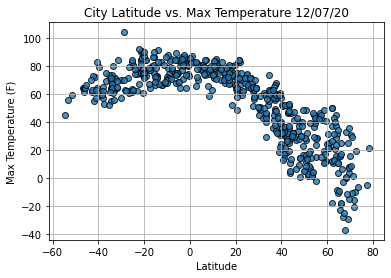

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

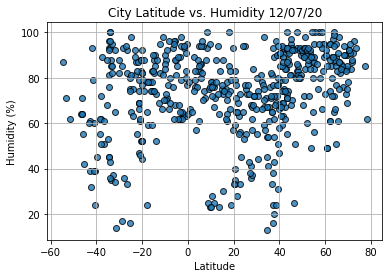

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

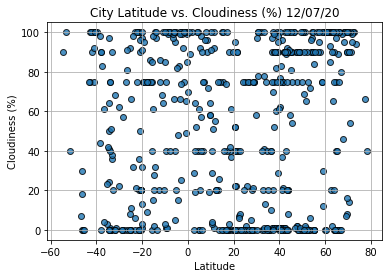

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


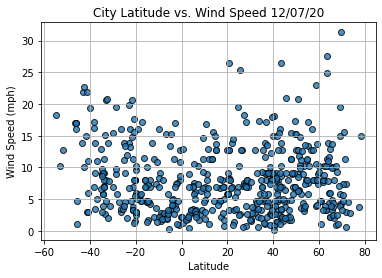

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Tuktoyaktuk,69.45,-133.04,3.20,84,90,5.82,CA,2020-12-08 01:49:24
4,Tasiilaq,65.61,-37.64,15.80,61,0,3.36,GL,2020-12-08 01:49:25
6,Taicheng,38.73,113.23,18.68,72,100,2.73,CN,2020-12-08 01:49:25
11,Upernavik,72.79,-56.15,19.00,96,100,4.50,GL,2020-12-08 01:49:26
13,Wad Rawah,15.16,33.14,67.46,30,0,13.71,SD,2020-12-08 01:49:26


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

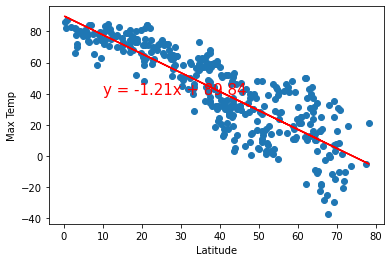

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

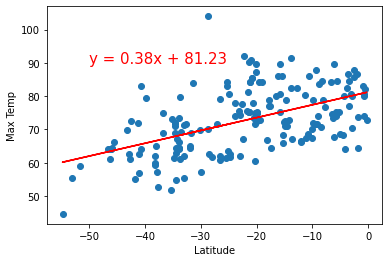

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

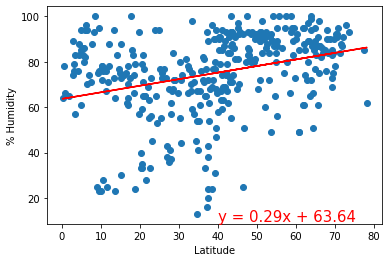

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

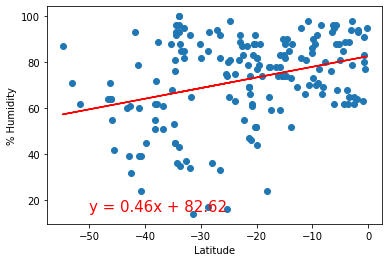

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

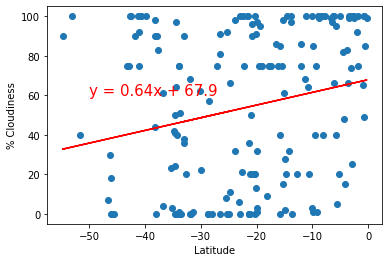

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

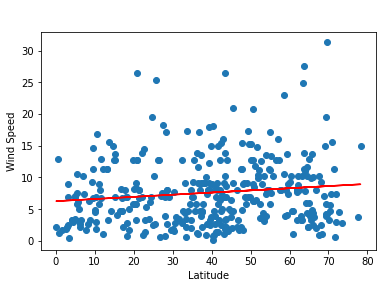

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

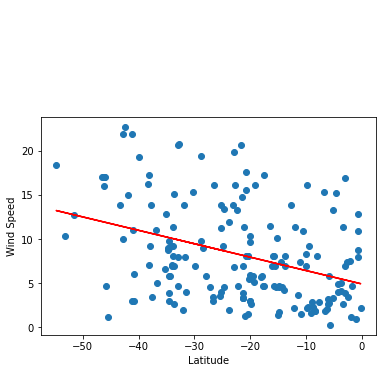

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
